CLASSFIFICATION MODELS: (Binary features)

Binary Classification: Classification task with two possible outcomes. Eg: Gender classification (Male / Female)

Multi-class classification: Classification with more than two classes. In multi class classification each sample is assigned to one and only one target label. Eg: An animal can be cat or dog but not both at the same time

Multi-label classification: Classification task where each sample is mapped to a set of target labels (more than one class). Eg: A news article can be about sports, a person, and location at the same time.

1. Logistic Regression: 
Advantages: Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values.

2. Support Vector Machine
Definition: Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

Advantages: Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

Disadvantages: The algorithm does not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

3. Ensemble technique: Random Forest CLassifier
Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.Can handle large datasets. Will output the importance of variables. Can handle missing values.

Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

4. KNN
Definition: Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

Advantages: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.Easy to use, understand and interpret.
Quick calculation time.
No assumptions about data.
High accuracy of predictions.
Versatile – Can be used for both Classification and Regression Business Problems.
Can be used for Multi Class Problems as well.
We have only one Hyper parameter to tweak at Hyperparameter Tuning step.

Disadvantages: Need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples.

5. Decision Tree
Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data. 

Disadvantages: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

6. Stochastic Gradient Descent
Definition: Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.
Advantages: Efficiency and ease of implementation.
Disadvantages: Requires a number of hyper-parameters and it is sensitive to feature scaling.
from sklearn.linear_model import SGDClassifier 


Comparison Matrix
Accuracy: (True Positive + True Negative) / Total Population
Accuracy is a ratio of correctly predicted observation to the total observations. Accuracy is the most intuitive performance measure.
True Positive: The number of correct predictions that the occurrence is positive
True Negative: The number of correct predictions that the occurrence is negative
F1-Score: (2 x Precision x Recall) / (Precision + Recall)
F1-Score is the weighted average of Precision and Recall used in all types of classification algorithms. Therefore, this score takes both false positives and false negatives into account. F1-Score is usually more useful than accuracy, especially if you have an uneven class distribution.
Precision: When a positive value is predicted, how often is the prediction correct?
Recall: When the actual value is positive, how often is the prediction correct?

##Problem Statement:##

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

https://data.world/preetims/fraud-detection/workspace/project-summary?agentid=raghu543&datasetid=credit-card-fraud-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
!pip install -U imbalanced-learn


In [2]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#This shows the highly imbalanced set. 
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
#https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/
#Selecting metric: Here, Class:1 is a fraud transaction, <80% of total class, hence ACCURACY should not be used, 
#confusion matrix shall be baised. Best metric: F1 measure, AUPRC

#Start cross-validation and apply algorithms, Check for correlation of features with Class and thus apply hyperparameter 


<AxesSubplot:>

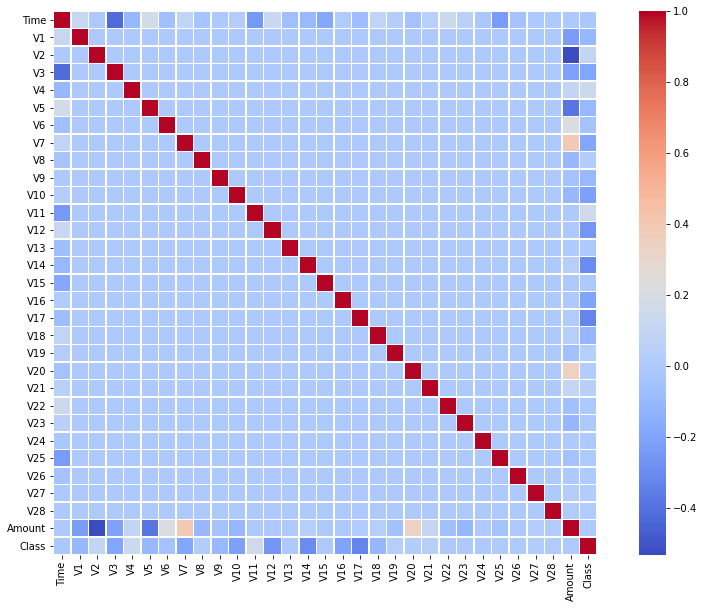

In [6]:
#CORRELATION
corr = dataset.corr()
f,ax = plt.subplots(figsize=(15,10) )
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt='.1f',cbar=True,ax=ax, square=True, xticklabels= True, yticklabels= True, linewidths=.5)

In [7]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Technique 0: Collect more data, if possible. 
Technique 1: Pick decision tree based approaches as they work better than logistic regression or SVM. Random Forest is a good algorithm to try but beware of over fitting. 
Technique 2: Up-sample minority class
Technique 3: Down-sample majority class 
Technique 4: A combination of Over and under sampling. 
Technique 5: Penalize learning algorithms that increase cost of classification mistakes on minority classes.
Technique 6: Generate synthetic data (SMOTE, ADASYN)
Technique 7: Add appropriate weights to your deep learning model. 

In [35]:
#Trying the model with class_weights parameter of LogisticReg:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lrmodel = LogisticRegression(solver='liblinear', class_weight='balanced')
lrmodel.fit(X_train, y_train)
yhat = lrmodel.predict(X_test)
# evaluate predictions
print('F-Measure: %.3f' % f1_score(y_test, yhat))

import sklearn.metrics
auprc = sklearn.metrics.average_precision_score(y_test, yhat)
print('AUPRC: %.3f' % auprc)

F-Measure: 0.126
AUPRC: 0.060


METRICS FOR IMBALANCED DATASET:

F-MEASURE: is a combined score of recall and precision. F1 score reaches its best value at 1 and worst score at 0.

HOW TO READ F-MEASURE?

Unbalanced class, but both classes are important: If the class distribution is highly skewed (such as 80:20 or 90:10), then a classifier can get a low mis-classification rate simply by choosing the majority class. In such a situation, I would choose the classifier that gets high F1 scores on both classes, as well as low mis-classification rate. A classifier that gets low F1-scores should be overlooked.
Unbalanced class, but one class if more important that the other. For e.g. in Fraud detection, it is more important to correctly label an instance as fraudulent, as opposed to labeling the non-fraudulent one. In this case, I would pick the classifier that has a good F1 score only on the important class. Recall that the F1-score is available per class.

AREA UNDER PRECISION-RECALL CURVE(AUPRC):

The AUPRC is calculated as the area under the PR curve. A PR curve shows the trade-off between precision and recall across different decision thresholds.

Because PR curves don’t use true negatives anywhere, the AUPRC won’t be “swamped” by a large proportion of true negatives in the data. You can use AUPRC on a dataset with 98% negative/2% positive examples, and it will “focus” on how the model handles the 2% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low. 

REFERENCE: https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc



# OPTION 1: CROSSVALIDATION AND HYPERPARAMETER TUNING
for imbalanced dataset

In [8]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [9]:
clf=GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\prash\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prash\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\prash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [10]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[56846    29]
 [   31    56]]
0.9989466661985184
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.66      0.64      0.65        87

    accuracy                           1.00     56962
   macro avg       0.83      0.82      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
from sklearn.metrics import f1_score
print('F-Measure: %.3f' % f1_score(y_test, y_pred))
import sklearn.metrics
auprc = sklearn.metrics.average_precision_score(y_test, y_pred)
print('AUPRC: %.3f' % auprc)

F-Measure: 0.843
AUPRC: 0.717


In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred2 = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[56870     5]
 [   20    67]]
0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.77      0.84        87

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



We are looking to improve Precision and Recall rates. Precision:1.00 is best case scenario where we can classify all fraudulent transctions 100%. Recall is sensitivity rate should also be 1.0, where they are no False Negatives reported. 
Trade-off between Precision and Recall is a tough task. When the policy is stringent, precision shall increase however we cannot say the same for Recall score as Recall shall decrease

In [38]:
from sklearn.metrics import f1_score
print('F-Measure: %.3f' % f1_score(y_test, y_pred2))
import sklearn.metrics
auprc2 = sklearn.metrics.average_precision_score(y_test, y_pred2)
print('AUPRC: %.3f' % auprc2)

F-Measure: 0.843
AUPRC: 0.717


# OPTION 2: OVER-SAMPLING AND UNDERSAMPLING:
Nearmiss: undersampling (Not advised as we can lose a major chunk of data)


RandomOverSampler: oversampling

In [13]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss(0.8)
X_train_ns,y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\prash\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 227440, 1: 405})
The number of classes after fit Counter({0: 506, 1: 405})


In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier_ns = RandomForestClassifier()
classifier_ns.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [39]:
y_pred_ns = classifier_ns.predict(X_test)
print(confusion_matrix(y_test,y_pred_ns))
print(accuracy_score(y_test,y_pred_ns))
print(classification_report(y_test,y_pred_ns))

[[50016  6859]
 [    7    80]]
0.8794635019837787
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     56875
           1       0.01      0.92      0.02        87

    accuracy                           0.88     56962
   macro avg       0.51      0.90      0.48     56962
weighted avg       1.00      0.88      0.93     56962



In [40]:
from sklearn.metrics import f1_score
print('F-Measure: %.3f' % f1_score(y_test, y_pred_ns))
import sklearn.metrics
auprc3 = sklearn.metrics.average_precision_score(y_test, y_pred_ns)
print('AUPRC: %.3f' % auprc3)

F-Measure: 0.023
AUPRC: 0.011


In [16]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.75)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

C:\Users\prash\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 227440, 1: 405})
The number of classes after fit Counter({0: 227440, 1: 170580})


In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier_os = RandomForestClassifier()
classifier_os.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [18]:
y_pred_os = classifier_os.predict(X_test)
print(confusion_matrix(y_test,y_pred_os))
print(accuracy_score(y_test,y_pred_os))
print(classification_report(y_test,y_pred_os))

[[56870     5]
 [   20    67]]
0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.77      0.84        87

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [41]:
from sklearn.metrics import f1_score
print('F-Measure: %.3f' % f1_score(y_test, y_pred_os))

import sklearn.metrics
auprc4 = sklearn.metrics.average_precision_score(y_test, y_pred_os)
print('AUPRC: %.3f' % auprc4)

F-Measure: 0.843
AUPRC: 0.717


# OPTION 3 : SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print('Before',counter)
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_smt)
print ('After', counter)

Before Counter({0: 227440, 1: 405})
After Counter({0: 227440, 1: 227440})


In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier_smt = RandomForestClassifier()
classifier_smt.fit(X_train_smt, y_train_smt)

RandomForestClassifier()

In [21]:
y_pred_smt = classifier_smt.predict(X_test)
print(confusion_matrix(y_test,y_pred_smt))
print(accuracy_score(y_test,y_pred_smt))
print(classification_report(y_test,y_pred_smt))

[[56865    10]
 [   18    69]]
0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.87      0.79      0.83        87

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [42]:
from sklearn.metrics import f1_score
print('F-Measure: %.3f' % f1_score(y_test, y_pred_smt))
import sklearn.metrics
auprc5 = sklearn.metrics.average_precision_score(y_test, y_pred_smt)
print('AUPRC: %.3f' % auprc5)

F-Measure: 0.831
AUPRC: 0.693


RandomForestClassifier with SMOTE
F-Measure: 0.831
AUPRC: 0.693

RANDOMFOREST CLASSIFIER WITH OVERSAMPLING
F-Measure: 0.843     HIGH
AUPRC: 0.717         HIGH

RANDOMFOREST CLASSIFIER WITH UNDERSAMPLING
F-Measure: 0.023
AUPRC: 0.011

LOGISTIC REGRESSION WITH CLASS WEIGHTS:
F-Measure: 0.126
AUPRC: 0.060

LOGISTIC REGRESSION WITH HYPER PARAMETER TUNING: GRIDSEARCHCV
F-Measure: 0.843         HIGH
AUPRC: 0.717             HIGH